# 폐암환자 생존률 예측 ver.2
- 은닉층 추가
- 데이터 정규화

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 실행할때마다 같은 결과를 출력하기 위해
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 준비된 수술 환자 데이터를 불러들임
from google.colab import files
uploaded = files.upload()
uploaded

Saving ThoraricSurgery.csv to ThoraricSurgery.csv


{'ThoraricSurgery.csv': b'293,1,3.8,2.8,0,0,0,0,0,0,12,0,0,0,1,0,62,0\n1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0\n8,2,3.19,2.5,1,0,0,0,1,0,11,0,0,1,1,0,66,1\n14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1\n17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0\n18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0\n35,2,2.76,2.2,1,0,0,0,1,0,11,0,0,0,0,0,76,0\n42,2,3.24,2.52,1,0,0,0,1,0,12,0,0,0,1,0,63,1\n65,2,3.15,2.76,1,0,1,0,1,0,12,0,0,0,1,0,59,0\n111,2,4.48,4.2,0,0,0,0,0,0,12,0,0,0,1,0,55,0\n121,2,3.84,2.56,1,0,0,0,1,0,11,0,0,0,0,0,59,0\n123,2,2.8,2.12,1,0,0,1,1,0,13,0,0,0,1,0,80,0\n130,2,5.6,4.64,1,0,0,0,1,0,11,0,0,0,1,0,45,0\n132,2,2.12,1.72,1,0,0,0,0,0,12,0,0,0,1,0,74,0\n133,2,2.5,71.1,0,0,0,1,0,0,13,0,0,0,1,0,64,1\n137,2,3.76,3.08,1,0,0,0,1,0,13,0,0,0,1,0,54,0\n141,2,2.16,1.56,1,0,0,0,1,0,11,0,0,0,1,0,63,0\n145,2,3.64,2.48,2,0,0,0,1,1,11,0,0,0,1,0,70,0\n164,2,2.4,1.96,1,0,0,0,1,0,12,0,0,0,0,0,73,0\n165,2,3,2.4,1,0,0,0,1,0,14,0,0,0,1,0,58,0\n167,2,3.4,2.12,1,0,0,0,1,1,11,0,0,0,1,0,62,0\n172,2,2.88,

In [5]:
filename = list(uploaded.keys())[0]
filename

'ThoraricSurgery.csv'

In [6]:
Data_set = np.loadtxt(filename, delimiter=",")
Data_set[:3, :]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,  12.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   1.  ,  14.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ,   0.  ,   0.  ,
          1.  ,   0.  ,  11.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ,
         66.  ,   1.  ]])

### 데이터 정규화

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(Data_set[:, :-1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, Data_set[:, -1], stratify=Data_set[:, -1], random_state=seed
)
X_train.shape, X_test.shape

((352, 17), (118, 17))

### 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(24, input_shape=(17,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=10)

Epoch 1/30
29/29 [==============================] - 1s 10ms/step - loss: 1.0117 - accuracy: 0.3884 - val_loss: 0.6948 - val_accuracy: 0.5915
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5990 - val_loss: 0.5736 - val_accuracy: 0.7746
Epoch 3/30
29/29 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7523 - val_loss: 0.5119 - val_accuracy: 0.7887
Epoch 4/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.8236 - val_loss: 0.4800 - val_accuracy: 0.7746
Epoch 5/30
29/29 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8030 - val_loss: 0.4675 - val_accuracy: 0.7887
Epoch 6/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8522 - val_loss: 0.4664 - val_accuracy: 0.7746
Epoch 7/30
29/29 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8485 - val_loss: 0.4631 - val_accuracy: 0.7746
Epoch 8/30
29/29 [=

In [15]:
acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.8475
Accuracy: 0.8475


### 학습 과정 시각화

In [16]:
type(history.history)

dict

In [17]:
history.history['accuracy'][:3]

[0.43772241473197937, 0.6370106935501099, 0.7758007049560547]

In [18]:
history.history['loss'][:3]

[0.8986875414848328, 0.6466381549835205, 0.5226797461509705]

In [19]:
history.history['val_accuracy'][:3]

[0.591549277305603, 0.7746478915214539, 0.7887324094772339]

In [20]:
history.history['val_loss'][:3]

[0.6948457360267639, 0.5735763311386108, 0.5119476318359375]

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
y_vloss = history.history['val_loss']

In [23]:
y_acc = history.history['accuracy']

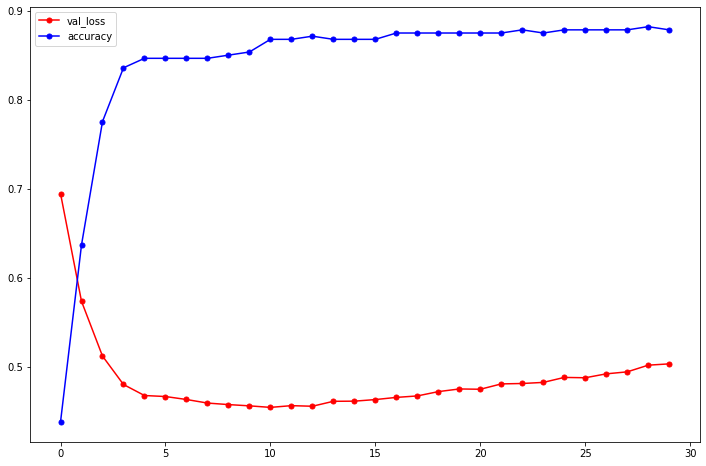

In [26]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o-", c="red", markersize=5, label='val_loss')
plt.plot(x_len, y_acc, "o-", c="blue", markersize=5, label='accuracy')
plt.legend()
plt.show()